In [1]:
import json
with open("snowball.json", "r", encoding="utf-8") as f:
    snowball_data = json.load(f)
with open("alphabet.json", "r", encoding="utf-8") as f:
    alphabet_data = json.load(f)

In [4]:
def get_gender_age_distribution(data):
    gender_count = {}
    age_count = {}
    for celeb in data:
        gender = celeb.get("gender", "unknown")
        age = celeb.get("age", "unknown")

        if gender not in gender_count:
            gender_count[gender] = 0
        gender_count[gender] += 1

        if age not in age_count:
            age_count[age] = 0
        age_count[age] += 1
    return gender_count, age_count


In [5]:
snowball_gender_distribution, snowball_age_distribution = get_gender_age_distribution(snowball_data)
alphabet_gender_distribution, alphabet_age_distribution = get_gender_age_distribution(alphabet_data)


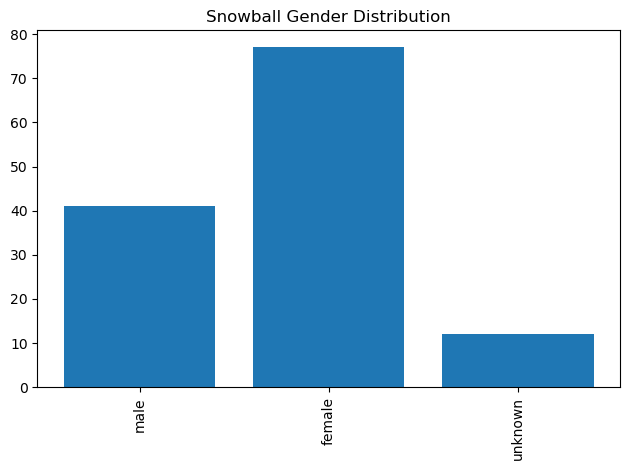

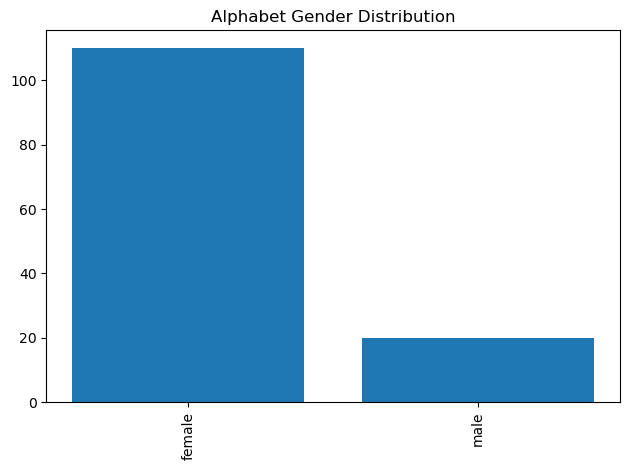

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_gender_distribution(distribution, title):
    gender_count = {}
    for gender, count in distribution.items():
        if gender not in gender_count:
            gender_count[gender] = 0
        gender_count[gender] += count
        if gender is None:
            gender_count['unknown'] = gender_count.get('unknown', 0) + count
        gender_count.pop(None, None)

    labels = list(gender_count.keys())
    counts = list(gender_count.values())

    x = np.arange(len(labels))
    plt.bar(x, counts)
    plt.xticks(x, labels, rotation='vertical')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_gender_distribution(snowball_gender_distribution, "Snowball Gender Distribution")
plot_gender_distribution(alphabet_gender_distribution, "Alphabet Gender Distribution")

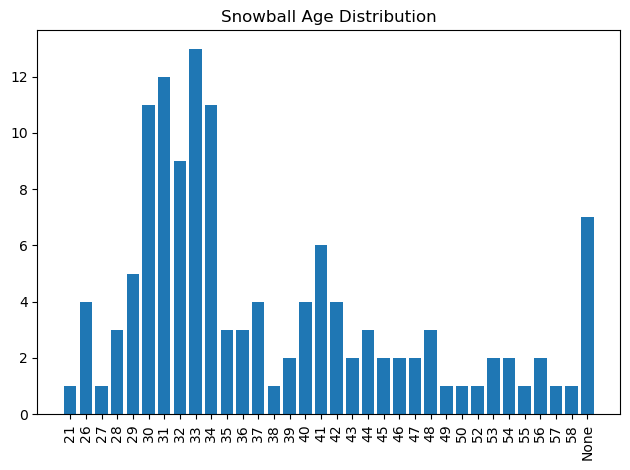

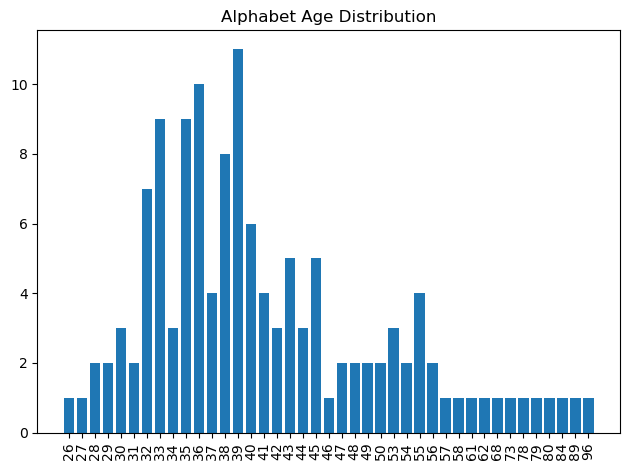

In [12]:
def plot_age_distribution(distribution, title):
    # sort by key age ascending
    sorted_items = sorted(distribution.items(), key=lambda x: (x[0] is None, x[0]))
    labels = [str(item[0]) for item in sorted_items]
    counts = [item[1] for item in sorted_items]

    x = np.arange(len(labels))
    plt.bar(x, counts)
    plt.xticks(x, labels, rotation='vertical')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_age_distribution(snowball_age_distribution, "Snowball Age Distribution")
plot_age_distribution(alphabet_age_distribution, "Alphabet Age Distribution")